##  Cryptocurrency Price & Market Data

Real-Time Market Trends & Volatility

#### Introduction

Cryptocurrencies have emerged as a disruptive force in the financial world, offering decentralized digital currencies that operate independently of traditional banking systems. However, the cryptocurrency market is characterized by its inherent volatility, with prices fluctuating wildly within short periods.

Volatility is a measure of the rate at which the price of an asset fluctuates. In the context of the cryptocurrency market, it refers to the rapid and significant price movements experienced by digital assets.

#### Business Problem
The high volatility of the cryptocurrecy is both a characteristic and a challenge of this market, offering opportunities for profit but also exposing investors to substantial risks. Therefore this analysis is meant to show the trends of the various coins within a short period-2days. The analysis can be used to further build a future predictive model to assist in capping the high volatility of the coins. 


#### About The Data

The project uses two datasets representing the changes in prices of the various crytocurrency coins over 2 days. The two datasets have been combined to form one dataset for ease of analysis.

The dataset collects important data points such as the name of the cryptocurrency, symbol, price, hourly and daily change trends, 24 hour volume traded and market capitalization.

The dataset features:

1.'*Coin & Symbol*-Coins column represents the name of the various cryptocurrencies while symbol column represents the symbols for each other.The symbol column will enables the user to distinguish between coins with similar names (such as Bitcoin vs Bitcoin Cash).

2.*Price*- Price column represents the price each coin is trading for at any given time.

3.*1h,24h&7d*-1h, 24h and 7d columns are used to compare prices over time periods longer than one hour (for example from 1 hour ago to now or 7 days ago until today). This will give the user an indication of price volatility over time periods longer than one hour which can be used for forecasting market movement trends or as input in deep learning/neural networks models for predicting future price movements of various cryptocurrencies

4.*24h_voume*- 24h_volume gives volume traded in last 24 hours which helps users understand market momentum vis-a-vis volume traded during that period for cryptocurrency trading & understanding liquidity situation in any given period.

5.*mkt_cap*- The ‘mkt_cap’ column gives information about market capitalisation that shows how big/valuable a coin is & tells if its worth buying or not via comparison of current value & all available units combined together based on supply & demand forces at work in CryptoCurrency eco system.

6.*date: Date of the data entry. (Date)

https://www.kaggle.com/datasets/thedevastator/cryptocurrency-price-market-data

#### Method
The analysis deployed in this project uses multiple linear regression methods to develop a model of house price using a subset of predictor variables. Several variables were log transformed, and all non-binary variables were standardized. Model iterations were compared by r-squared score.

#### Results

#### Conclusion



In [1]:
#Importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the first set of data-'coin_gecko_2022-03-16.csv'

df = pd.read_csv('coin_gecko_2022-03-16.csv')
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [4]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,5.000000e+02,497.000000,497.000000,497.000000,4.970000e+02,5.000000e+02
mean,6.527851e+02,0.018746,0.028849,0.039016,3.276644e+08,3.722677e+09
std,4.578529e+03,0.013867,0.058065,0.203688,3.182264e+09,3.784349e+10
min,1.544000e-09,-0.039000,-0.141000,-0.547000,0.000000e+00,6.577043e+07
25%,1.904625e-01,0.011000,0.004000,-0.020000,1.838591e+06,1.146391e+08
50%,1.085000e+00,0.018000,0.021000,0.006000,8.581305e+06,2.083208e+08
75%,6.925000e+00,0.026000,0.040000,0.049000,4.075655e+07,5.845642e+08
max,4.121727e+04,0.086000,0.573000,2.935000,5.793497e+10,7.709915e+11


In [5]:
#Reading the second set of data-'coin_gecko_2022-03-17.csv'

df1 = pd.read_csv('coin_gecko_2022-03-17.csv')
df1

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17
...,...,...,...,...,...,...,...,...,...
495,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17
496,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17
497,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17
498,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          496 non-null    float64
 4   24h         496 non-null    float64
 5   7d          495 non-null    float64
 6   24h_volume  496 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [7]:
df1.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,5.000000e+02,496.000000,496.000000,495.000000,4.960000e+02,5.000000e+02
mean,6.594269e+02,0.000681,0.018615,0.008038,2.508801e+08,3.787932e+09
std,4.595355e+03,0.033128,0.060142,0.252549,2.285948e+09,3.826905e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,4.349000e+01,6.731896e+07
25%,2.043850e-01,-0.001000,0.000000,-0.051500,1.757171e+06,1.194822e+08
50%,1.100000e+00,0.001000,0.011000,-0.014000,7.890414e+06,2.168525e+08
75%,7.435000e+00,0.004000,0.030000,0.020000,3.638643e+07,6.091268e+08
max,4.090907e+04,0.095000,0.577000,4.608000,4.413140e+10,7.760774e+11


# Combining Datasets

In [8]:
combined = pd.concat([df,df1])
combined

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17
496,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17
497,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17
498,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17


In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 78.1+ KB


In [10]:
combined.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11


# Data Cleaning

In [11]:
combined.isna().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [12]:
combined.dropna(inplace=True)

In [13]:
combined.isna().sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

In [14]:
combined.duplicated().sum()

0

In [15]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        992 non-null    object 
 1   symbol      992 non-null    object 
 2   price       992 non-null    float64
 3   1h          992 non-null    float64
 4   24h         992 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  992 non-null    float64
 7   mkt_cap     992 non-null    float64
 8   date        992 non-null    object 
dtypes: float64(6), object(3)
memory usage: 77.5+ KB


In [16]:
pd.to_datetime(combined['date'])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        992 non-null    object 
 1   symbol      992 non-null    object 
 2   price       992 non-null    float64
 3   1h          992 non-null    float64
 4   24h         992 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  992 non-null    float64
 7   mkt_cap     992 non-null    float64
 8   date        992 non-null    object 
dtypes: float64(6), object(3)
memory usage: 77.5+ KB


In [17]:
combined

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17
496,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17
497,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17
498,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17


# Visualizations

In [18]:
# Market trends in the last 1h, 24h, 7days
combined[['1h', '24h', '7d']].describe().T.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#000000'), ('color', 'white')]}])


,count,mean,std,min,25%,50%,75%,max
1h,992.000000,0.009682,0.026917,-0.704000,0.001000,0.006000,0.019000,0.095000
24h,992.000000,0.024018,0.058668,-0.646000,0.001000,0.016000,0.035000,0.577000
7d,992.000000,0.023558,0.229781,-0.558000,-0.041000,-0.000500,0.037000,4.608000


1. 1h column refers to the percentage change in the last 1 hour
2. 24h column refers to the percentage change in the last 24 hours
3. 7d column refers to the percentage change in the last 7 days

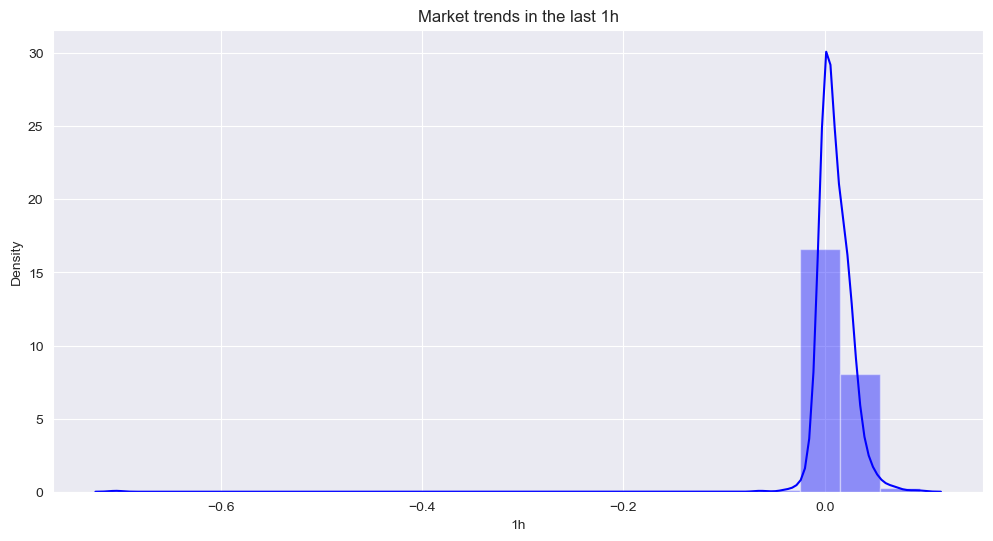

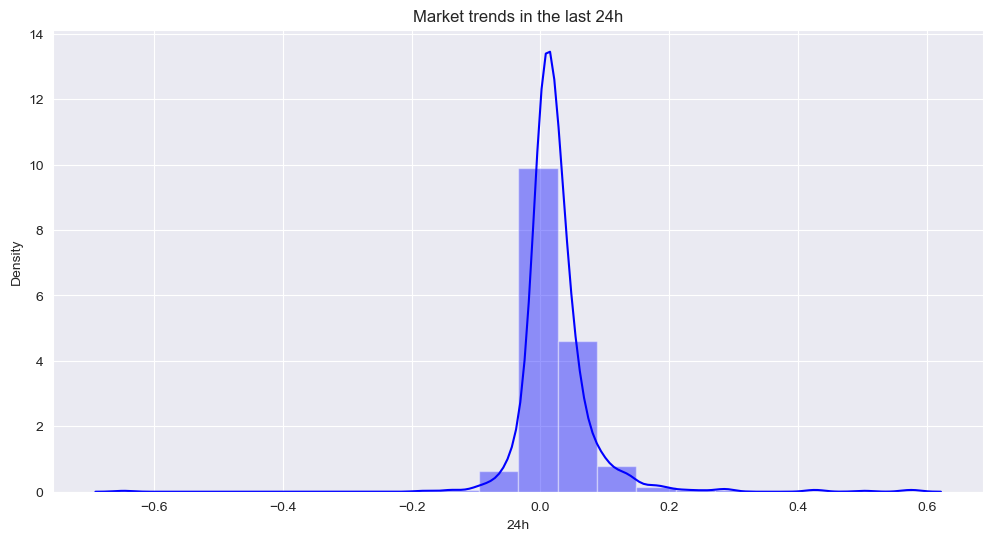

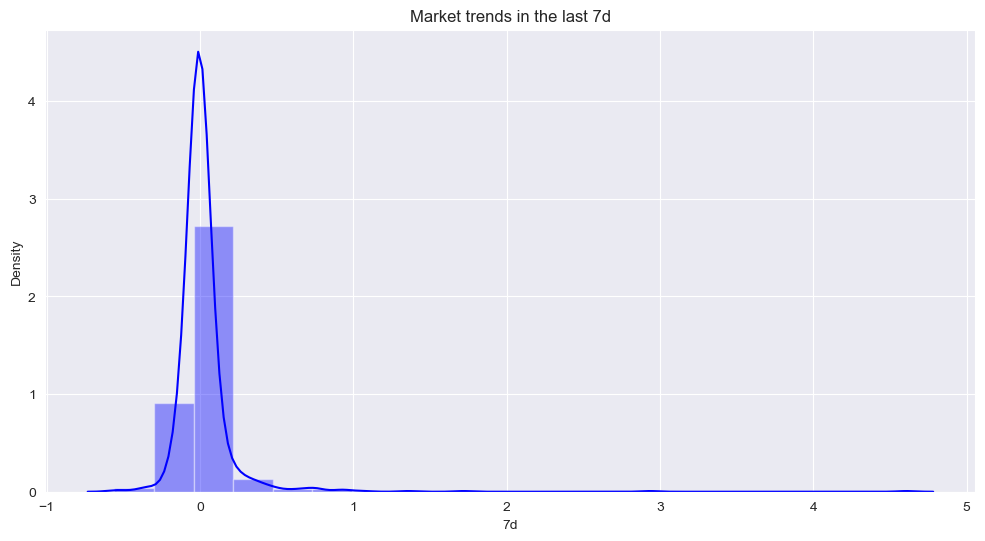

In [19]:
def plot_trends(dataset, col, title):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    sns.distplot(dataset[col], bins=20, color='blue')
    plt.show()

plot_trends(combined, '1h', 'Market trends in the last 1h')
plot_trends(combined, '24h', 'Market trends in the last 24h')
plot_trends(combined, '7d', 'Market trends in the last 7d')

In [20]:
# Market trends in the last 1h, 24h, 7days, price
combined[['1h', '24h', '7d', 'price']].describe().T.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#000000'), ('color', 'white')]}])

,count,mean,std,min,25%,50%,75%,max
1h,992.000000,0.009682,0.026917,-0.704000,0.001000,0.006000,0.019000,0.095000
24h,992.000000,0.024018,0.058668,-0.646000,0.001000,0.016000,0.035000,0.577000
7d,992.000000,0.023558,0.229781,-0.558000,-0.041000,-0.000500,0.037000,4.608000
price,992.000000,620.052127,4421.997963,0.000000,0.194055,1.095000,6.955000,41217.270000


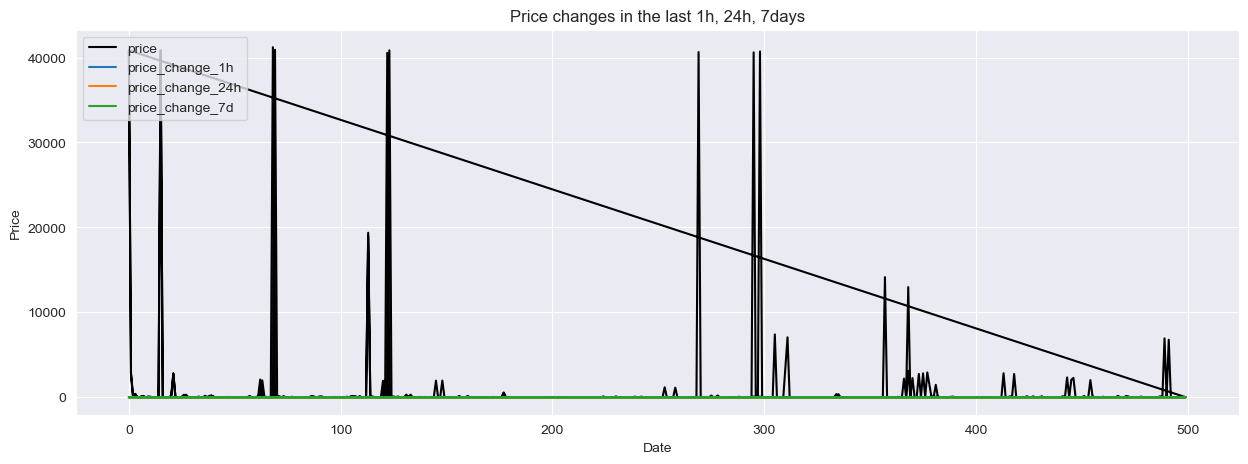

In [21]:
# Plot price changes in the last 1h, 24h, 7days 
fig, ax = plt.subplots(
    figsize=(15, 5),)
ax.plot(combined.index, combined['price'], label='price', color='black')
ax.plot(combined.index, combined['1h'],
        label='price_change_1h')    
ax.plot(combined.index, combined['24h'],
        label='price_change_24h')
ax.plot(combined.index, combined['7d'],
        label='price_change_7d')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Price changes in the last 1h, 24h, 7days')
ax.legend(loc='upper left')
plt.show();

In [22]:
# # Calculate the mean,median and std deviation of price changes in the last 1h
# mean=np.mean(combined['1h'])
# median=np.median(combined['1h'])
# Std=combined['1h'].std()

# # plotting one figure
# plt.figure(figsize=(20, 14))
# sns.set_style('darkgrid')
# plt.subplot(3,2,1)


# # visualizing the mean ,median and std of price changes in the last 1h
# # visualizing distribution of price in the last 1h
# sns.histplot(data=combined, x='1h', bins=50,color='brown', kde=True )
# plt.title('price Changes in the last 1h')
# plt.axvline(mean,color='Green',label = 'Mean')
# plt.axvline(median,color='blue',label = 'Median')
# plt.axvline(mean-Std, color='red',linestyle='dashed', label = 'Lower quantile')
# plt.axvline(mean+Std, color='purple',linestyle='dashed' ,label = 'Upper quantile')
# plt.legend()

# # visualizing prices changes in the last 1h
# plt.subplot(3,2,2)
# sns.boxplot(y='1h',data=combined , color='brown')
# plt.title('Price changes in the last 1h')

# # getting the mean,meadian and std of price changes in the last 24h
# mean=np.mean(combined['24h'])
# median=np.median(combined['24h'])
# Std=combined['24h'].std()

# # Visualize price changes in the last 24h
# plt.subplot(3,2,3)
# sns.countplot(data=combined, x='24h', color='black')
# plt.title('Price Changes in the last 24h')
# plt.axvline(mean,color='Green',label = 'Mean')
# plt.axvline(median,color='blue',label = 'Median')
# plt.axvline(mean-Std, color='red',linestyle='dashed', label = 'Lower quantile')
# plt.axvline(mean+Std, color='purple',linestyle='dashed' ,label = 'Upper quantile')
# plt.legend()

# plt.subplot(3,2,4)
# sns.boxplot(y='24h',data=combined , color='black')
# plt.title('Price Changes in the last 24h')

# # getting the mean,meadian and std of price changes in the last 7d
# mean=np.mean(combined['7d'])
# median=np.median(combined['7d'])
# Std=combined['7d'].std()

# # Visualize price changes in the last 7d
# plt.subplot(3,2,5)
# sns.countplot(data=combined, x='7d', color='green')
# plt.title('Price Changes in the last 7d')
# plt.axvline(mean,color='Green',label = 'Mean')
# plt.axvline(median,color='blue',label = 'Median')
# plt.axvline(mean-Std, color='red',linestyle='dashed', label = 'Lower quantile')
# plt.axvline(mean+Std, color='purple',linestyle='dashed' ,label = 'Upper quantile')
# plt.legend()

# plt.subplot(3,2,6)
# sns.boxplot(y='7d',data=combined , color='green')
# plt.title('Price Changes in the last 7d')

# # # Getting the mean,median and std
# # mean=np.mean(combined['price'])
# # median=np.median(combined['price'])
# # Std=combined['price'].std()

# # # visualization of price changes
# # plt.subplot(3,2,7)
# # sns.countplot(data=combined, x='price', color='b')
# # plt.title('Price Changes')
# # plt.axvline(mean,color='Green',label = 'Mean')
# # plt.axvline(median,color='blue',label = 'Median')
# # plt.axvline(mean-Std, color='red',linestyle='dashed', label = 'Lower quantile')
# # plt.axvline(mean+Std, color='purple',linestyle='dashed' ,label = 'Upper quantile')
# # plt.legend()

# # plt.subplot(3,2,8)
# # sns.boxplot(y='price',data=combined , color='orange')
# # plt.title('Price Changes')

# plt.show()

In [23]:
# Top 10 coins by market capitalization
top_10 = combined.sort_values(by='mkt_cap', ascending=False).head(10)
top_10

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


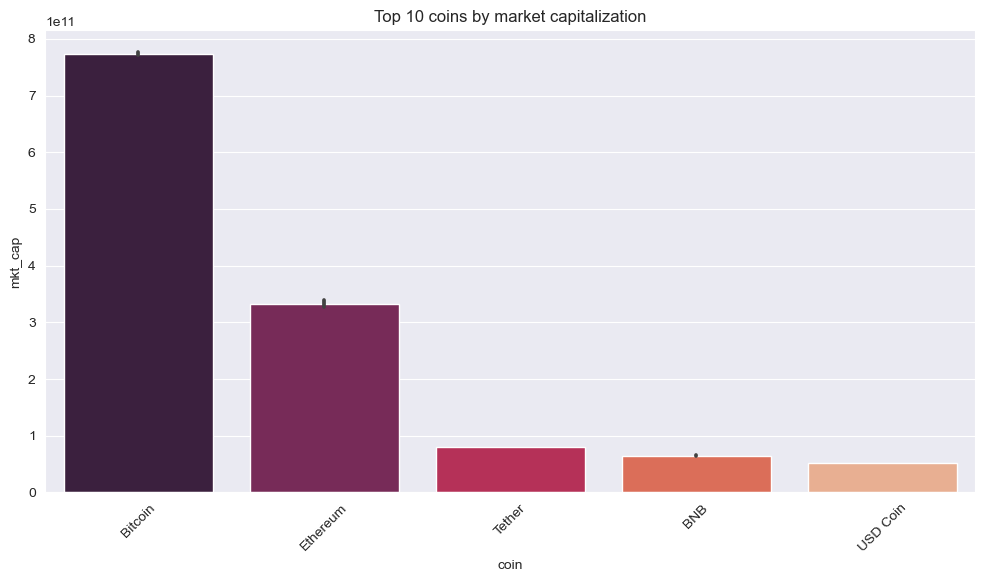

In [24]:
plt.figure(figsize=(12, 6))
plt.title('Top 10 coins by market capitalization')
sns.barplot(x=top_10['coin'], y=top_10['mkt_cap'], palette='rocket')
plt.xticks(rotation=45)
plt.show();

Market cap is the total market value of a cryptocurrency's circulating supply. It is analogous to the free-float capitalization in the stock market. Market cap = Current Price x Circulating Supply.

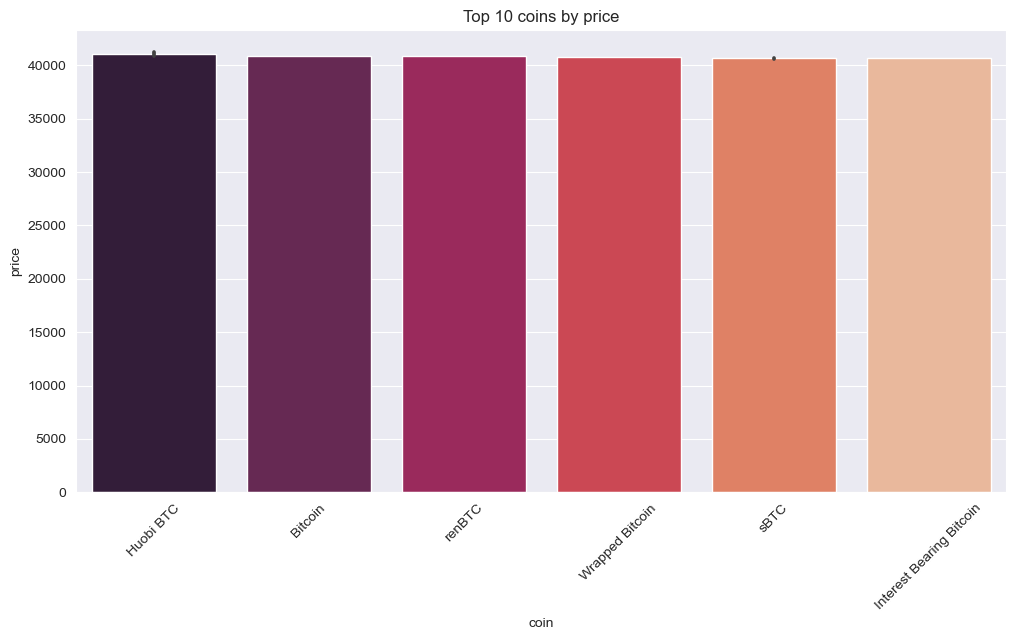

In [25]:
# Top 10 coins by price
top_10 = combined.sort_values(by='price', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.title('Top 10 coins by price')
sns.barplot(x=top_10['coin'], y=top_10['price'], palette='rocket')
plt.xticks(rotation=45)
plt.show();

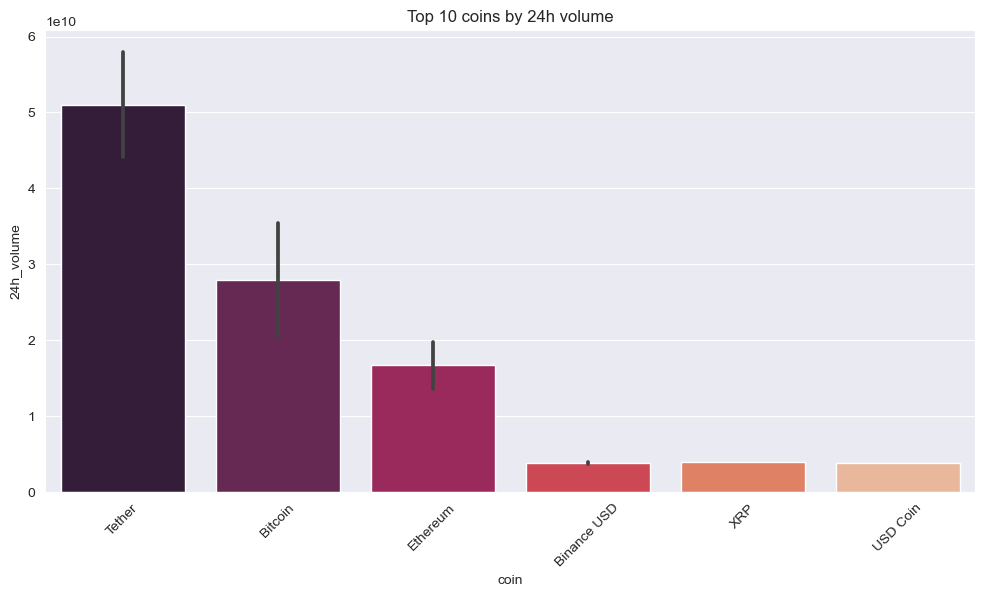

In [26]:
# Top 10 coins by 24h volume
top_10 = combined.sort_values(by='24h_volume', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.title('Top 10 coins by 24h volume')
sns.barplot(x=top_10['coin'], y=top_10['24h_volume'], palette='rocket')
plt.xticks(rotation=45)
plt.show();

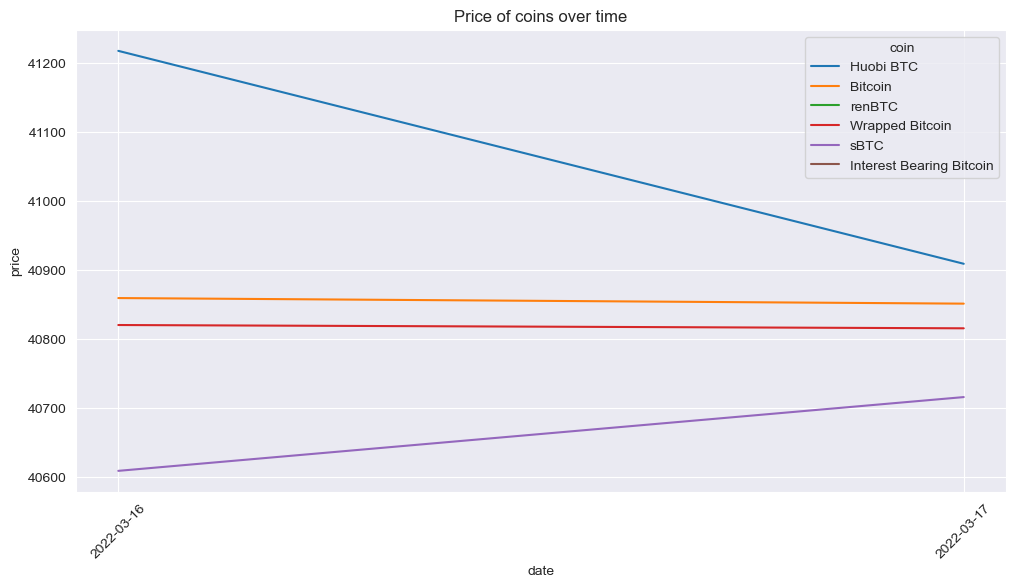

In [27]:
top_10 = combined.sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.title('Price of coins over time')
sns.lineplot(x='date', y='price', hue='coin', data=top_10)
plt.xticks(rotation=45)
plt.show();

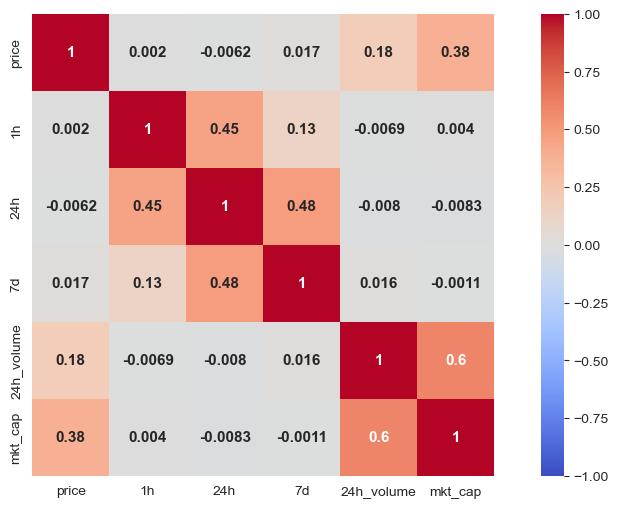

In [28]:
combined1 = combined[['price', '1h', '24h','7d', '24h_volume', 'mkt_cap']]
Corr = combined1.corr()

# heatmap to show correlation
plt.figure(figsize=(12, 6))
sns.heatmap(Corr,cmap='coolwarm',vmin=-1,vmax=1,annot=True,square=True,
           annot_kws={'fontsize':11,'fontweight':'bold'})
plt.show()

In [29]:
# coins with the highest correlation with price

Corr['price'].sort_values(ascending=False).head(10)

price         1.000000
mkt_cap       0.382511
24h_volume    0.184090
7d            0.016843
1h            0.002043
24h          -0.006181
Name: price, dtype: float64

In [30]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        992 non-null    object 
 1   symbol      992 non-null    object 
 2   price       992 non-null    float64
 3   1h          992 non-null    float64
 4   24h         992 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  992 non-null    float64
 7   mkt_cap     992 non-null    float64
 8   date        992 non-null    object 
dtypes: float64(6), object(3)
memory usage: 77.5+ KB


In [31]:
# Since 1h , 24h and 7d are pct changes, we will use the pct_change() method to calculate the pct change of the price
combined['price_pct_change'] = combined['price'].pct_change()
combined['mkt_cap_pct_change'] = combined['mkt_cap'].pct_change()
combined['24h_volume_pct_change'] = combined['24h_volume'].pct_change()

combined.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,price_pct_change,mkt_cap_pct_change,24h_volume_pct_change
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,NaN,NaN,NaN
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,-0.932833,-0.575735,-0.441982
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,-0.999636,-0.755536,1.933610
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,382.430000,-0.199103,-0.975907
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,-0.997392,-0.184587,1.774125


In [32]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   coin                   992 non-null    object 
 1   symbol                 992 non-null    object 
 2   price                  992 non-null    float64
 3   1h                     992 non-null    float64
 4   24h                    992 non-null    float64
 5   7d                     992 non-null    float64
 6   24h_volume             992 non-null    float64
 7   mkt_cap                992 non-null    float64
 8   date                   992 non-null    object 
 9   price_pct_change       991 non-null    float64
 10  mkt_cap_pct_change     991 non-null    float64
 11  24h_volume_pct_change  991 non-null    float64
dtypes: float64(9), object(3)
memory usage: 100.8+ KB


In [33]:
combined2 = combined[['price', '1h', '24h','7d', '24h_volume', 'mkt_cap', 'price_pct_change', 'mkt_cap_pct_change', '24h_volume_pct_change' ]]
corr = combined2.corr()

corr['price'].sort_values(ascending=False).head(10)

price                    1.000000
mkt_cap                  0.382511
mkt_cap_pct_change       0.302363
24h_volume               0.184090
price_pct_change         0.049177
7d                       0.016843
24h_volume_pct_change    0.005235
1h                       0.002043
24h                     -0.006181
Name: price, dtype: float64

In [34]:
# Creating synthetic features
combined['price_mkt_cap_ratio'] = combined['price'] / combined['mkt_cap']
combined['price_24h_volume_ratio'] = combined['price'] / combined['24h_volume']
combined['mkt_cap_24h_volume_ratio'] = combined['mkt_cap'] / combined['24h_volume']

combined3 = combined[['price', '1h', '24h','7d', '24h_volume', 'mkt_cap', 'price_pct_change', 'mkt_cap_pct_change', '24h_volume_pct_change', 'price_mkt_cap_ratio', 'price_24h_volume_ratio', 'mkt_cap_24h_volume_ratio']]
corr = combined3.corr()
corr['price'].sort_values(ascending=False).head(10)

price                     1.000000
price_mkt_cap_ratio       0.630786
mkt_cap                   0.382511
mkt_cap_pct_change        0.302363
price_24h_volume_ratio    0.295635
24h_volume                0.184090
price_pct_change          0.049177
7d                        0.016843
24h_volume_pct_change     0.005235
1h                        0.002043
Name: price, dtype: float64

In [35]:
# Extracting the month and year from the date column
import datetime
combined['month'] = pd.DatetimeIndex(combined['date']).month
combined['year'] = pd.DatetimeIndex(combined['date']).year
combined['day'] = pd.DatetimeIndex(combined['date']).day

corr = combined3.corr()
corr['price'].sort_values(ascending=False).head(10)

price                     1.000000
price_mkt_cap_ratio       0.630786
mkt_cap                   0.382511
mkt_cap_pct_change        0.302363
price_24h_volume_ratio    0.295635
24h_volume                0.184090
price_pct_change          0.049177
7d                        0.016843
24h_volume_pct_change     0.005235
1h                        0.002043
Name: price, dtype: float64

In [36]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   coin                      992 non-null    object 
 1   symbol                    992 non-null    object 
 2   price                     992 non-null    float64
 3   1h                        992 non-null    float64
 4   24h                       992 non-null    float64
 5   7d                        992 non-null    float64
 6   24h_volume                992 non-null    float64
 7   mkt_cap                   992 non-null    float64
 8   date                      992 non-null    object 
 9   price_pct_change          991 non-null    float64
 10  mkt_cap_pct_change        991 non-null    float64
 11  24h_volume_pct_change     991 non-null    float64
 12  price_mkt_cap_ratio       992 non-null    float64
 13  price_24h_volume_ratio    992 non-null    float64
 14  mkt_cap_24h_vol

In [37]:
# Adding seasonality features
combined['season'] = combined['month'].apply(lambda x: 'winter' if x in [12, 1, 2] else ('spring' if x in [3, 4, 5] else ('summer' if x in [6, 7, 8] else 'autumn')))
combined['season'] = combined['season'].astype('category')

combined['season'].value_counts()

season
spring    992
Name: count, dtype: int64

In [38]:
# circulating supply
combined['circulating_supply'] = combined['mkt_cap'] / combined['price']

# volume to market cap ratio
combined['volume_to_mkt_cap_ratio'] = combined['24h_volume'] / combined['mkt_cap']

# price to volume ratio
combined['price_to_volume_ratio'] = combined['price'] / combined['24h_volume']

# price to circulating supply ratio
combined['price_to_circulating_supply_ratio'] = combined['price'] / combined['circulating_supply']

combined4 = combined[['price', '1h', '24h','7d', '24h_volume', 'mkt_cap', 'price_pct_change', 'mkt_cap_pct_change', '24h_volume_pct_change', 'price_mkt_cap_ratio', 'price_24h_volume_ratio', 'mkt_cap_24h_volume_ratio', 'circulating_supply' , 'volume_to_mkt_cap_ratio', 'price_to_volume_ratio', 'price_to_circulating_supply_ratio']]
corr = combined4.corr()

corr['price'].sort_values(ascending=False).head(10)

price                                1.000000
price_to_circulating_supply_ratio    0.639359
price_mkt_cap_ratio                  0.630786
mkt_cap                              0.382511
mkt_cap_pct_change                   0.302363
price_24h_volume_ratio               0.295635
price_to_volume_ratio                0.295635
24h_volume                           0.184090
price_pct_change                     0.049177
7d                                   0.016843
Name: price, dtype: float64

In [39]:
combined['open'] = combined['price'] / (1 + combined['price_pct_change'])
combined['24h_pct_change'] = combined['price_pct_change'] * 24
combined['high'] = combined['open'] + (combined['open'] * combined['24h_pct_change'])
combined['low'] = combined['open'] - (combined['open'] * combined['24h_pct_change'])

combined5 = combined[['price', '1h', '24h','7d', '24h_volume', 'mkt_cap', 'price_pct_change', 'mkt_cap_pct_change', '24h_volume_pct_change', 'price_mkt_cap_ratio', 'price_24h_volume_ratio', 'mkt_cap_24h_volume_ratio', 'circulating_supply' , 'volume_to_mkt_cap_ratio', 'price_to_volume_ratio', 'price_to_circulating_supply_ratio', 'open', '24h_pct_change', 'high','low']]
corr = combined5.corr()

corr['price'].sort_values(ascending=False).head(10)

price                                1.000000
high                                 0.708748
price_to_circulating_supply_ratio    0.639359
price_mkt_cap_ratio                  0.630786
mkt_cap                              0.382511
mkt_cap_pct_change                   0.302363
price_to_volume_ratio                0.295635
price_24h_volume_ratio               0.295635
24h_volume                           0.184090
24h_pct_change                       0.049177
Name: price, dtype: float64

In [40]:
combined['30d'] = combined['price'].rolling(window=30).mean()
combined['60d'] = combined['price'].rolling(window=60).mean()
combined['90d'] = combined['price'].rolling(window=90).mean()

combined['30d_pct_change'] = combined['30d'].pct_change()
combined['60d_pct_change'] = combined['60d'].pct_change()
combined['90d_pct_change'] = combined['90d'].pct_change()

combined['30d_pct_change'] = combined['30d_pct_change'] * 30
combined['60d_pct_change'] = combined['60d_pct_change'] * 60
combined['90d_pct_change'] = combined['90d_pct_change'] * 90

combined['30d_high'] = combined['30d'] + combined['30d_pct_change']
combined['30d_low'] = combined['30d'] - combined['30d_pct_change']

combined['60d_high'] = combined['60d'] + combined['60d_pct_change']
combined['60d_low'] = combined['60d'] - combined['60d_pct_change']

combined['90d_high'] = combined['90d'] + combined['90d_pct_change']
combined['90d_low'] = combined['90d'] - combined['90d_pct_change']

combined6 = combined[['price', '1h', '24h','7d', '24h_volume', 'mkt_cap', 'price_pct_change', 'mkt_cap_pct_change', '24h_volume_pct_change', 'price_mkt_cap_ratio', 'price_24h_volume_ratio', 'mkt_cap_24h_volume_ratio', 'circulating_supply' , 'volume_to_mkt_cap_ratio', 'price_to_volume_ratio', 'price_to_circulating_supply_ratio', 'open', '24h_pct_change', 'high','low', '30d','60d', '90d', '30d_pct_change', '60d_pct_change', '90d_pct_change','30d_high', '30d_low', '60d_high', '60d_low', '90d_high', '90d_low']]
corr = combined6.corr()
corr['price'].sort_values(ascending=False).head(10)

price                                1.000000
high                                 0.708748
price_to_circulating_supply_ratio    0.639359
price_mkt_cap_ratio                  0.630786
30d_pct_change                       0.555593
90d_pct_change                       0.532925
60d_pct_change                       0.516876
mkt_cap                              0.382511
mkt_cap_pct_change                   0.302363
price_24h_volume_ratio               0.295635
Name: price, dtype: float64

In [41]:
# Obtain high correlated features with price ver 0.55
high_corr_features = corr['price'][corr['price'] > 0.55].index.tolist()
high_corr_features.remove('price')
high_corr_features

['price_mkt_cap_ratio',
 'price_to_circulating_supply_ratio',
 'high',
 '30d_pct_change']

In [42]:
#Interactive visualization displaying price trend by coin
def plot_sales_trends_colorful(selected_supplier):  #Function takes 'selected_supplier' argument
    if not selected_supplier:
        return

    selected_data = combined_df[combined_df['Supplier_Name'].isin(selected_supplier)]
  
    plt.figure(figsize=(10, 6))
    for supplier, data in selected_data.groupby('Supplier_Name'):
        sns.lineplot(x='Month', y='Sales(kg)', data=data, label=supplier, marker='o')

    plt.title('Sales
plt.xticks(rotation=45)
    plt.legend()
    plt.show()i

unique_suppliers = df['Supplier_Name'].unique()
supplier_selector = widgets.SelectMultiple(
    options=unique_suppliers,
    value=[unique_suppliers[0]],  # Default selection
    description='Select Supplier:',
    disabled=False
)

widgets.interactive(plot_sales_trends_colorful, selected_supplier=supplier_selector)

SyntaxError: unterminated string literal (detected at line 12) (1701743544.py, line 12)